In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

months = np.arange(12)
max_temps = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temps = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


In [2]:
def temp_func(x, a, b, c):
    return a * np.sin(2 * np.pi * x / 12) + b * np.cos(2 * np.pi * x / 12) + c


In [3]:
popt_max, pcov_max = curve_fit(temp_func, months, max_temps)
popt_min, pcov_min = curve_fit(temp_func, months, min_temps)


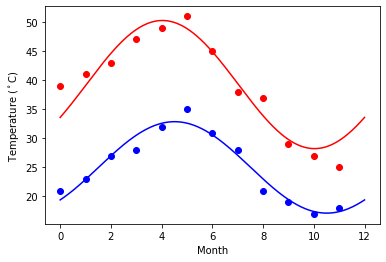

In [4]:
days = np.linspace(0, 12, num=365)

plt.plot(months, max_temps, 'ro')
plt.plot(days, temp_func(days, *popt_max), 'r-')
plt.plot(months, min_temps, 'bo')
plt.plot(days, temp_func(days, *popt_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()


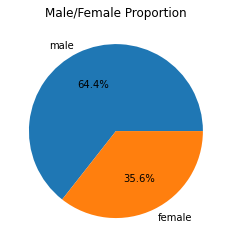

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

gender_counts = titanic['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.show()


In [6]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


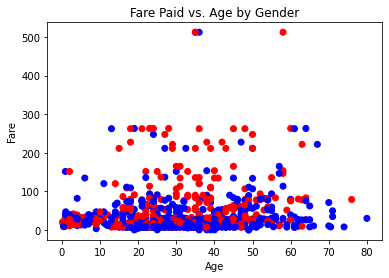

In [8]:
titanic = titanic.dropna(subset=['age', 'sex'])

colors = {'male':'blue', 'female':'red'}
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: colors[x]))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare Paid vs. Age by Gender')
plt.show()

